# Vyhlazovací filtry

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from skimage import img_as_float32, img_as_ubyte
import skimage.restoration as sr
import bm3d

In [2]:
DATA_PATH = f'../../Results/Resizing_Images/Images_ALL/2023_12_14_image_000.png'

img = cv2.imread(DATA_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_float = img_as_float32(img)

k_size = 9

In [3]:
def plot_images(img_ori,img_fil, title):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))

    ax1.title.set_text('Original image')
    ax1.imshow(img_ori)

    ax2.title.set_text(f'{title}')
    ax2.imshow(img_fil)

    plt.show()

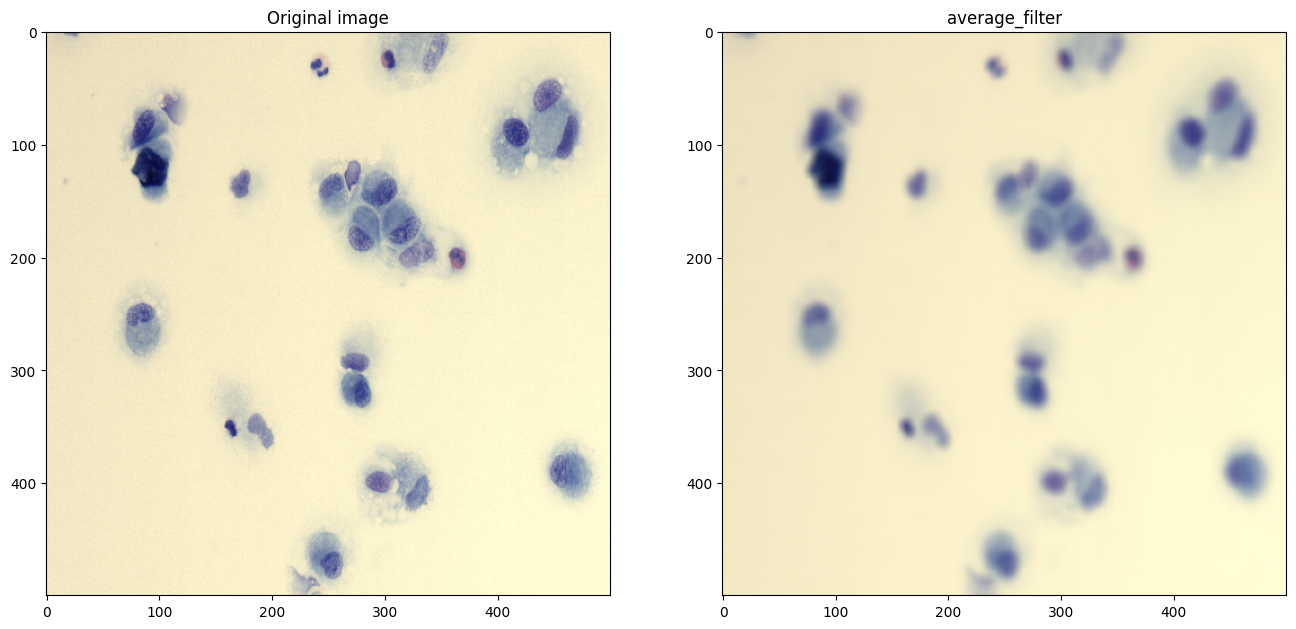

In [4]:
img_filtered = cv2.blur(img, (k_size, k_size))

plot_images(img,img_filtered,'average_filter')

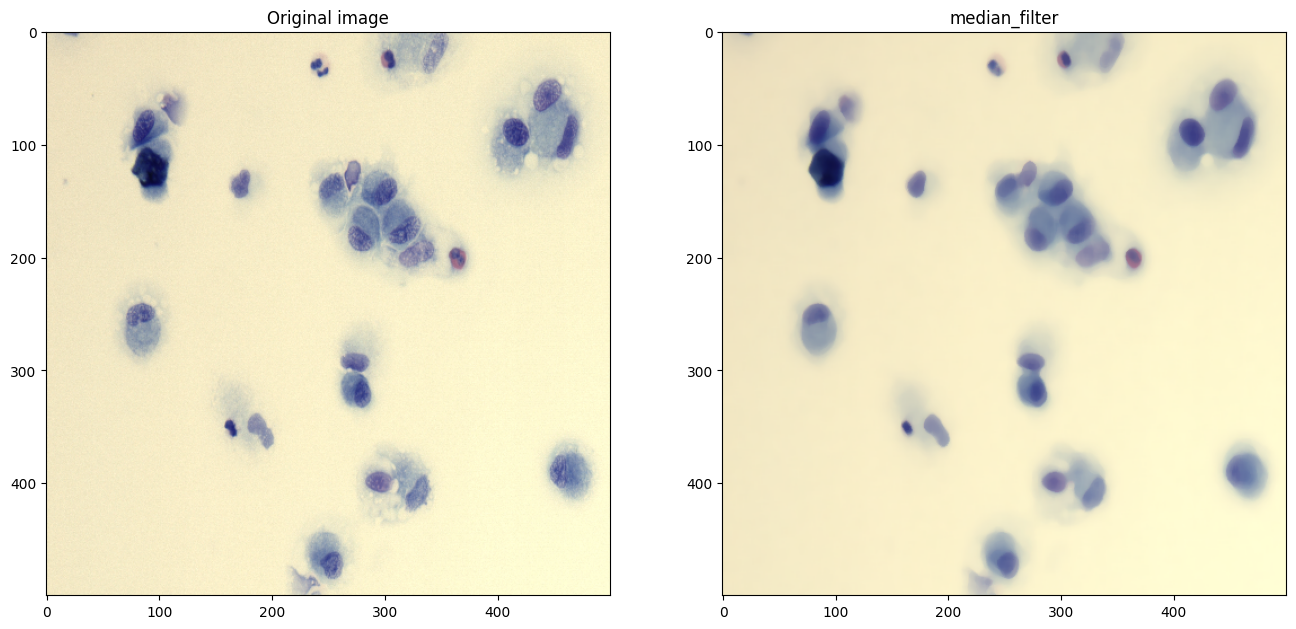

In [5]:
img_filtered = cv2.medianBlur(img, k_size)

plot_images(img,img_filtered,'median_filter')

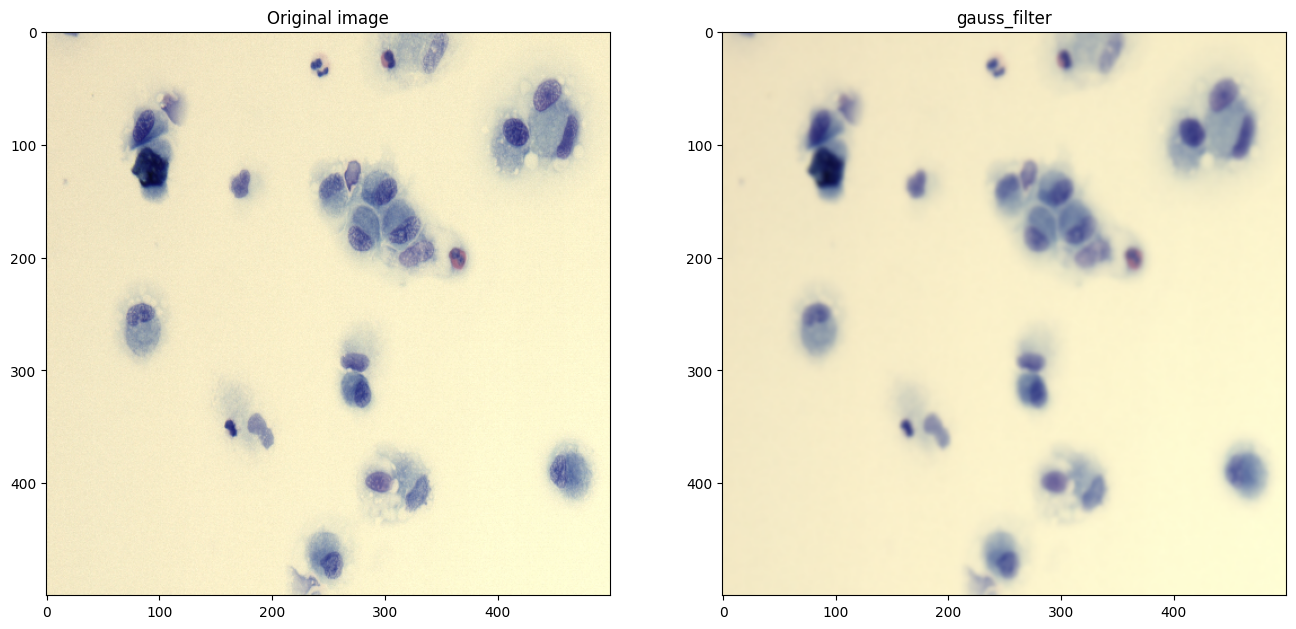

In [6]:
img_filtered = cv2.GaussianBlur(img, (k_size, k_size), sigmaX=0, sigmaY=0)

plot_images(img,img_filtered,'gauss_filter')

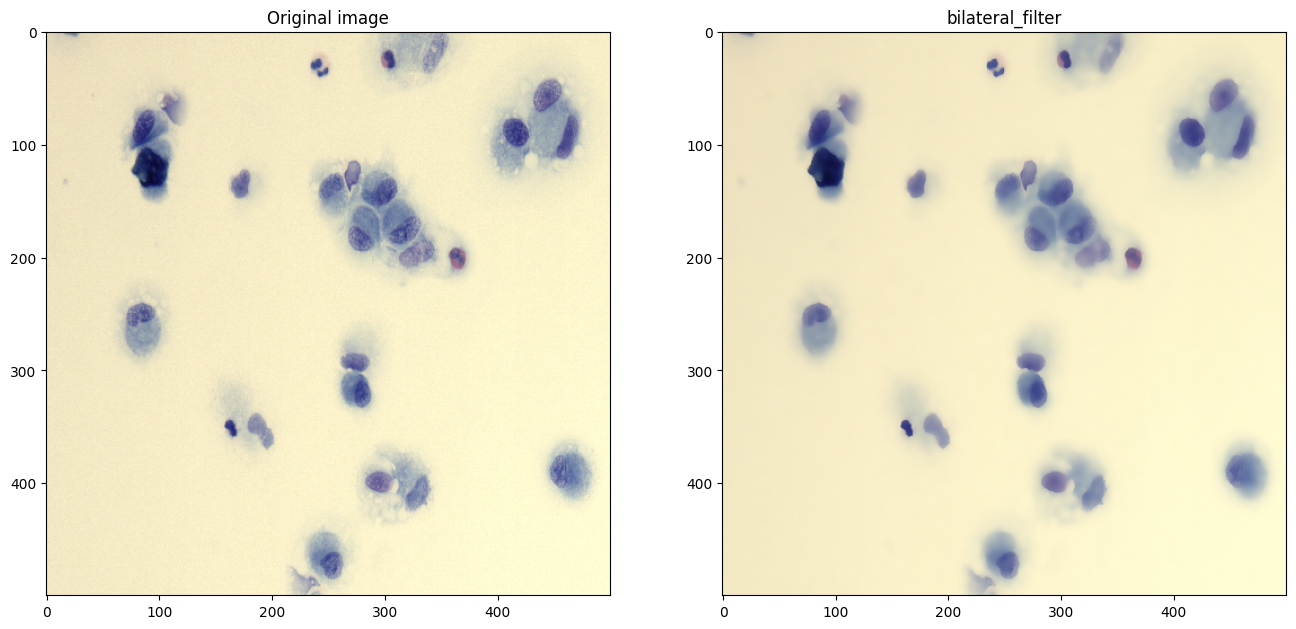

In [7]:
img_filtered = cv2.bilateralFilter(img, k_size, 80, 80)

plot_images(img,img_filtered,'bilateral_filter')

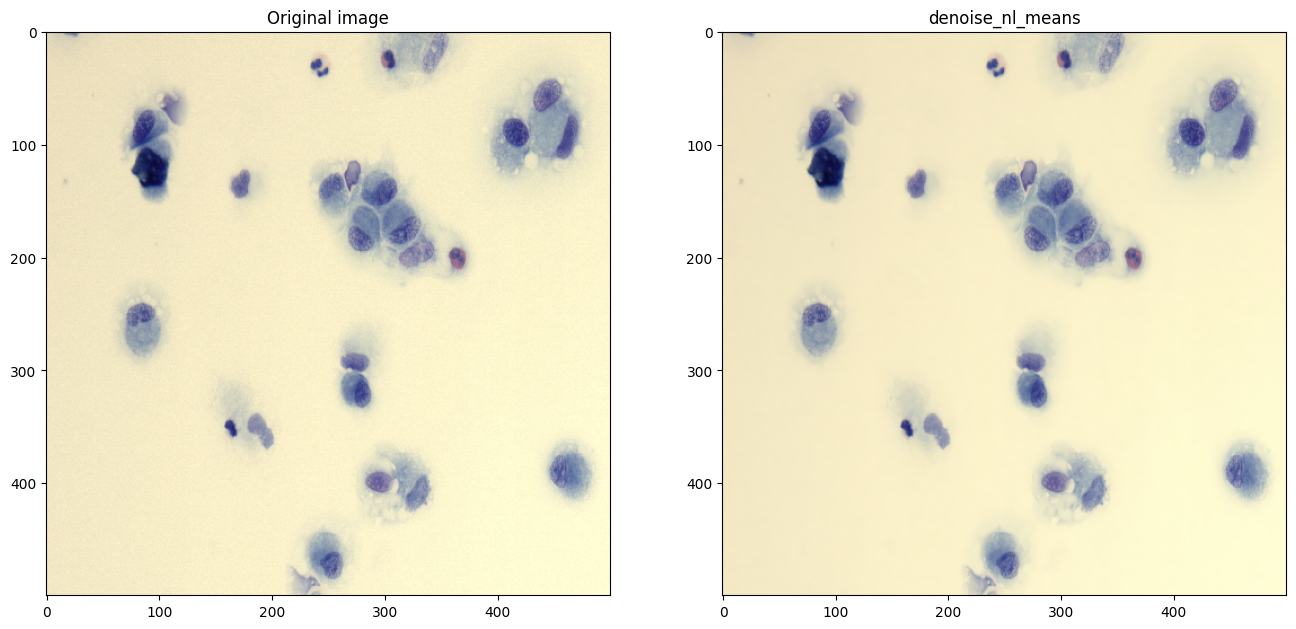

In [8]:
sigma_est = np.mean(sr.estimate_sigma(img_float, channel_axis=-1))
img_filtered = sr.denoise_nl_means(img_float, h=sigma_est, fast_mode=True, patch_size=5, patch_distance=3,channel_axis=-1)
img_filtered = img_as_ubyte(img_filtered)

plot_images(img,img_filtered,'denoise_nl_means')

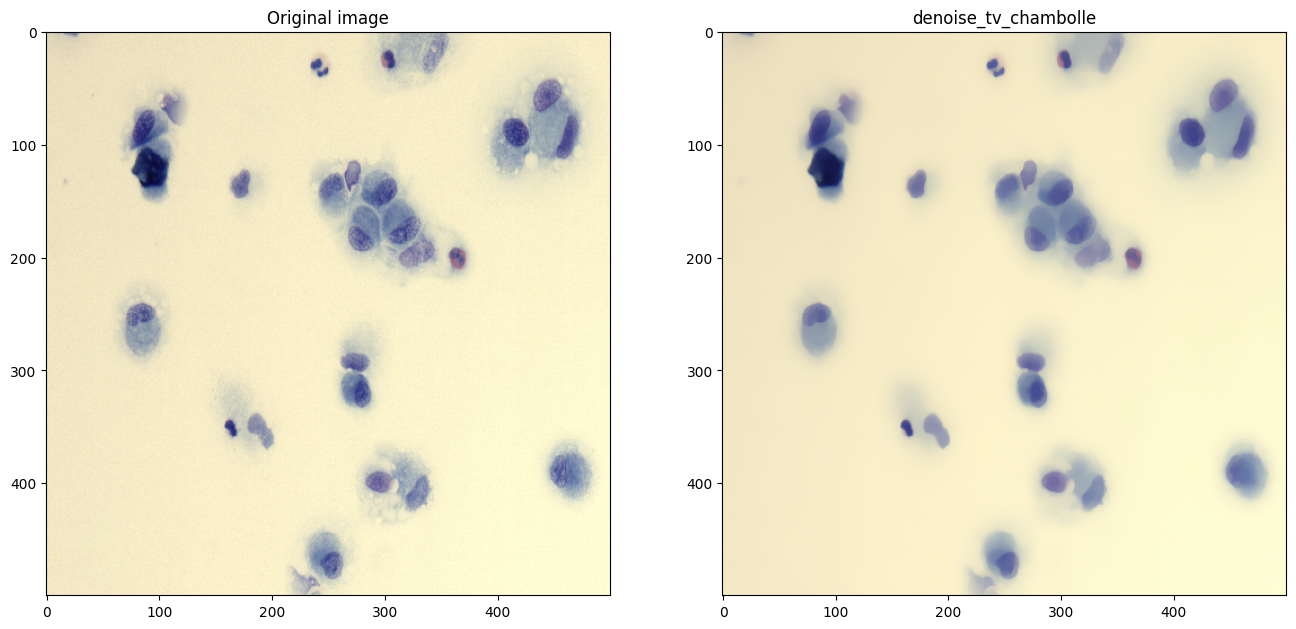

In [9]:
img_filtered = sr.denoise_tv_chambolle(img_float, weight=0.1, eps=0.0002, max_num_iter=200, channel_axis=-1)
img_filtered = img_as_ubyte(img_filtered)
    
plot_images(img,img_filtered,'denoise_tv_chambolle')

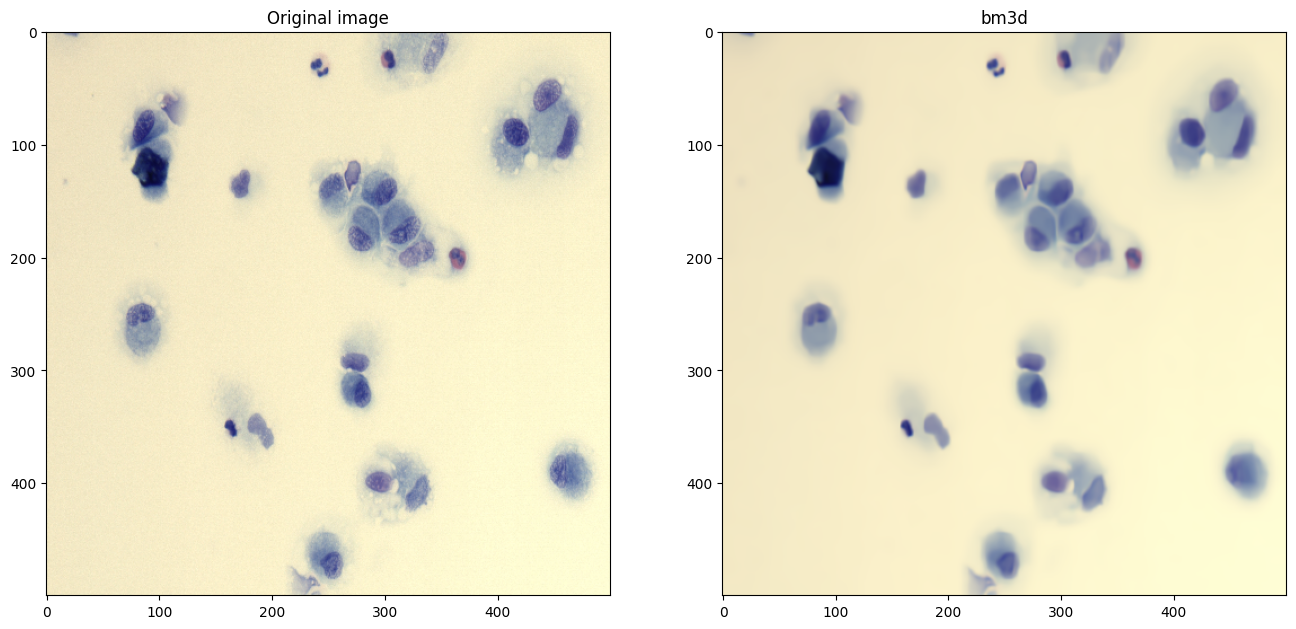

In [10]:
img_filtered = bm3d.bm3d(img_float, sigma_psd=0.1, stage_arg=bm3d.BM3DStages.ALL_STAGES)
img_filtered = img_as_ubyte(img_filtered)

plot_images(img,img_filtered,'bm3d')